In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [3]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10


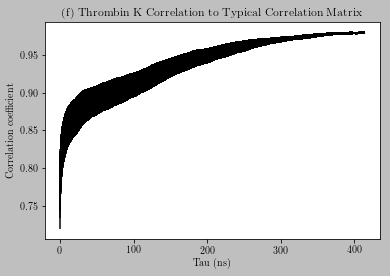

In [4]:
plt.style.use('grayscale')
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title(r'(f) Thrombin K Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('ThrombinK_prop_max_correlation_to_equaltime.png')

Bars are standard error

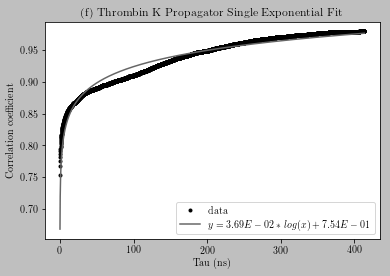

In [21]:
fit = np.polyfit(np.log(taus), average_to_max, 1)
yhat = fit[0]*np.log(taus) + fit[1]
plt.style.use('grayscale')
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.title('(f) Thrombin K Propagator Single Exponential Fit')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.legend(['data', '$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1])])
plt.savefig('FIT_ThrombinK_prop_max_correlation_to_equaltime.png')

[ -3.72488123e+01   1.70163052e-03   3.81062853e+01   1.67763196e-03]


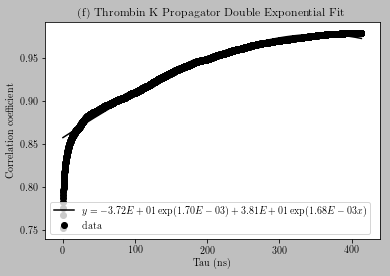

In [20]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(0.75,0.04,0,0),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.scatter(taus,average_to_max, label='data')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("(f) Thrombin K Propagator Double Exponential Fit")
plt.savefig('doubleFIT_ThrombinK_prop_max_correlation_to_equaltime.png')

[ -3.98574038e+01   1.54253449e-03   4.07235273e+01   1.52163352e-03
  -7.32410082e-02  -1.36025948e-01]


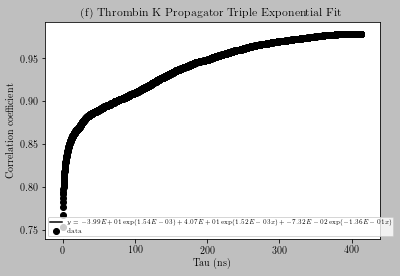

In [19]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-30.7,0.0017,38,.0017,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.scatter(taus,average_to_max, label='data')
plt.legend(loc='best', fontsize=6)
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("(f) Thrombin K Propagator Triple Exponential Fit")
plt.savefig('tripleFIT_ThrombinK_prop_max_correlation_to_equaltime.png')

# Time Lagged

In [3]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

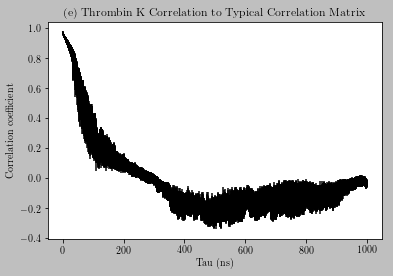

In [4]:
plt.style.use('grayscale')
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('(e) Thrombin K Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('ThrombinK_TL_correlation_to_equaltime.png')

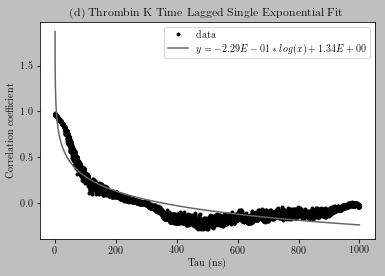

In [6]:
fit = np.polyfit(np.log(TLtaus), TLaverage, 1)
yhat = fit[0]*np.log(TLtaus) + fit[1]
plt.style.use('grayscale')
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.title("(d) Thrombin K Time Lagged Single Exponential Fit")
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.legend(['data', '$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1])])
plt.savefig('FIT_ThrombinK_TL_correlation_to_equaltime.png')

$$y = -0.22904136*log(x) + 1.34477927$$

[  5.09920923e+01  -3.79140591e-03  -5.00227314e+01  -3.70936355e-03]


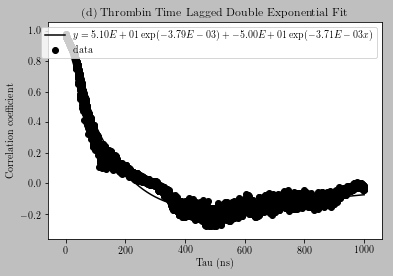

In [7]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(1.6,-0.29,0,0),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.scatter(TLtaus, TLaverage, label='data')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("(d) Thrombin Time Lagged Double Exponential Fit")

plt.savefig('doubleFIT_ThrombinK_TL_correlation_to_equaltime.png')

$$y = 5.09920923\times10^{1} e^{-3.79140591\times10^{-3}x} + -5.00227314\times10^{1} e^{-3.70936355\times10^{-3}x}$$

[  1.15882590e+00  -8.11526871e-03  -2.64654365e+00   1.94747341e-03
   2.50666526e+00   2.00187136e-03]


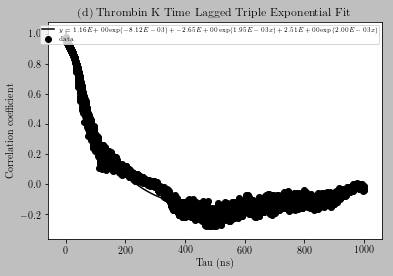

In [15]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.9,-0.0061,-3.89,-.00061,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.scatter(TLtaus, TLaverage, label='data')
plt.legend(loc='best', fontsize=6)
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("(d) Thrombin K Time Lagged Triple Exponential Fit")

plt.savefig('tripleFIT_ThrombinK_TL_correlation_to_equaltime.png')

$$y = 1.15882590 e^{-8.11526871\times10^{-3}x} + -2.64654365 e^{1.94747341\times10^{-3}x} + 2.50666526 e^{2.00187136\times10^{-3}}$$